<a href="https://colab.research.google.com/github/PROMITAGHOSH12/ADME-Property-Prediction_Caco-2/blob/main/caco2_wang_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES AND DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pip install pyTDC

In [3]:
pip install rdkit-pypi

In [4]:
from tdc import utils
names = utils.retrieve_benchmark_names('ADMET_Group')

In [5]:
names

['caco2_wang',
 'hia_hou',
 'pgp_broccatelli',
 'bioavailability_ma',
 'lipophilicity_astrazeneca',
 'solubility_aqsoldb',
 'bbb_martins',
 'ppbr_az',
 'vdss_lombardo',
 'cyp2d6_veith',
 'cyp3a4_veith',
 'cyp2c9_veith',
 'cyp2d6_substrate_carbonmangels',
 'cyp3a4_substrate_carbonmangels',
 'cyp2c9_substrate_carbonmangels',
 'half_life_obach',
 'clearance_microsome_az',
 'clearance_hepatocyte_az',
 'herg',
 'ames',
 'dili',
 'ld50_zhu']

In [6]:
from tdc.benchmark_group import admet_group
group = admet_group(path = 'data/')

Found local copy...


In [7]:
benchmark = group.get('caco2_wang')

In [8]:
benchmark

{'name': 'caco2_wang',
 'test':                Drug_ID                                               Drug  \
 0                 I-II  O=C(O)C[C@@H](c1cnc2ccccc2c1)N1CC[C@@H](CCCc2c...   
 1          aceclofenac              O=C(O)COC(=O)Cc1ccccc1Nc1c(Cl)cccc1Cl   
 2           Diclofenac                     O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl   
 3       amfenac sodium         Nc1c(CC(=O)[O-])cccc1C(=O)c1ccccc1.O.[Na+]   
 4              Amfenac                    Nc1c(CC(=O)O)cccc1C(=O)c1ccccc1   
 ..                 ...                                                ...   
 177  Trimethobenzamide        COc1cc(C(=O)NCc2ccc(OCCN(C)C)cc2)cc(OC)c1OC   
 178             EF5261  O=C(COc1ccc(C(=O)CN2CCN(C3CCN(C(=O)OC/C=C4/OC(...   
 179          puerarin   O=c1c(-c2ccc(O)cc2)coc2c([C@@H]3O[C@H](CO)[C@@...   
 180      Puerarin (34)  O=c1c(-c2ccc(O)cc2)coc2c(C3O[C@H](CO)[C@@H](O)...   
 181                E28   CNC(=O)/C=C(/c1ccc2nc(N)n(C3CCCC3)c2c1)c1ccccc1F   
 
             Y  
 0   -5.690000

In [9]:
name = benchmark['name']
train_val, test = benchmark['train_val'], benchmark['test']
#Spliting the data
train, valid = group.get_train_valid_split(benchmark = name, split_type = 'default',seed=2)

generating training, validation splits...
100%|██████████| 728/728 [00:00<00:00, 2549.26it/s]


In [10]:
print(train.shape)
train.head(3)

(637, 3)


,Drug_ID,Drug,Y
0,MEN15353,O=C(NC1(C(=O)N[C@H](Cc2ccccc2)C(=O)NC2CCN(CC3C...,-5.07
1,Bromazepam,O=C1CN=C(c2ccccn2)c2cc(Br)ccc2N1,-4.40
2,neolignan smi02,C/C=C/c1cc(OC)c2c(c1)C(C)C(c1cc(OC)c(O)c(OC)c1)O2,-5.34


In [11]:
print(test.shape)
test.head(5)

(182, 3)


,Drug_ID,Drug,Y
0,I-II,O=C(O)C[C@@H](c1cnc2ccccc2c1)N1CC[C@@H](CCCc2c...,-5.690000
1,aceclofenac,O=C(O)COC(=O)Cc1ccccc1Nc1c(Cl)cccc1Cl,-4.410000
2,Diclofenac,O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl,-4.460681
3,amfenac sodium,Nc1c(CC(=O)[O-])cccc1C(=O)c1ccccc1.O.[Na+],-4.520000
4,Amfenac,Nc1c(CC(=O)O)cccc1C(=O)c1ccccc1,-4.520000


In [12]:
print(valid.shape)
valid.head(5)

(91, 3)


,Drug_ID,Drug,Y
0,scopolamine,CN1[C@H]2CC(OC(=O)[C@H](CO)c3ccccc3)C[C@@H]1[C...,-4.928000
1,Scopolamine,CN1C2CC(OC(=O)C(CO)c3ccccc3)CC1C1OC12,-4.724059
2,"Dimethyl-4',4'-dimethoxy-5,6,5',6'-dimethylene...",COC(=O)c1cc(OC)c2c(c1-c1c(C(=O)OC)cc(OC)c3c1OC...,-4.168745
3,Bicyclol,COC(=O)c1cc(OC)c2c(c1-c1c(CO)cc(OC)c3c1OCO3)OCO2,-4.797940
4,vinblastine,CC[C@]1(O)C[C@@H]2CN(CCc3c([nH]c4ccccc34)[C@@]...,-5.480000


Feature extract

In [13]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [14]:
def molecular_descriptors(table):

  descriptors = pd.DataFrame()

  mol = [Chem.MolFromSmiles(drug) for drug in table.Drug]

  # Exact molecular weight of the molecule
  tdc = []
  tdc.append([Descriptors.ExactMolWt(i) for i in mol])
  descriptors['Exact_MW'] = tdc[0]

  # FpDensityMorgan1
  tdc = []
  tdc.append([Descriptors.FpDensityMorgan1(i) for i in mol])
  descriptors['FpDensityMorgan1'] = tdc[0]

  # FpDensityMorgan2
  tdc = []
  tdc.append([Descriptors.FpDensityMorgan2(i) for i in mol])
  descriptors['FpDensityMorgan2'] = tdc[0]

  # FpDensityMorgan3
  tdc = []
  tdc.append([Descriptors.FpDensityMorgan3(i) for i in mol])
  descriptors['FpDensityMorgan3'] = tdc[0]

  # Average molecular weight of the molecule ignoring hydrogens
  tdc = []
  tdc.append([Descriptors.HeavyAtomMolWt(i) for i in mol])
  descriptors['HeavyAtomMolWt'] = tdc[0]

  # MaxAbsPartialCharge
  tdc = []
  tdc.append([Descriptors.MaxAbsPartialCharge(i) for i in mol])
  descriptors['MaxAbsPartialCharge'] = tdc[0]

  # MaxPartialCharge
  tdc = []
  tdc.append([Descriptors.MaxPartialCharge(i) for i in mol])
  descriptors['MaxPartialCharge'] = tdc[0]

  # MinAbsPartialCharge
  tdc = []
  tdc.append([Descriptors.MinAbsPartialCharge(i) for i in mol])
  descriptors['MinAbsPartialCharge'] = tdc[0]

  # MinPartialCharge
  tdc = []
  tdc.append([Descriptors.MinPartialCharge(i) for i in mol])
  descriptors['MinPartialCharge'] = tdc[0]

  # Average molecular weight of the molecule
  tdc = []
  tdc.append([Descriptors.MolWt(i) for i in mol])
  descriptors['MolWt'] = tdc[0]

  # Number of radical electrons of the molecule
  tdc = []
  tdc.append([Descriptors.NumRadicalElectrons(i) for i in mol])
  descriptors['NumRadicalElectrons'] = tdc[0]

  # Number of valence electrons of the molecule
  tdc = []
  tdc.append([Descriptors.NumValenceElectrons(i) for i in mol])
  descriptors['NumValenceElectrons'] = tdc[0]

  # Log of partition coefficient
  tdc = []
  tdc.append([Descriptors.MolLogP(i) for i in mol])
  descriptors['Partition_Coefficient'] = tdc[0]
 ### Lipinski Descriptors ###
  # Fraction of C atoms that are SP3 hybridized
  tdc = []
  tdc.append([Lipinski.FractionCSP3(i) for i in mol])
  descriptors['FractionCSP3'] = tdc[0]

 # Number of heavy atoms a molecule
  tdc = []
  tdc.append([Lipinski.HeavyAtomCount(i) for i in mol])
  descriptors['Heavy_atoms'] = tdc[0]

  # Number of NHs or OHs
  tdc = []
  tdc.append([Lipinski.NHOHCount(i) for i in mol])
  descriptors['NHs/OHs'] = tdc[0]

  # Number of Nitrogens and Oxygens
  tdc = []
  tdc.append([Lipinski.NOCount(i) for i in mol])
  descriptors['N&O'] = tdc[0]

  # Number of aliphatic (containing at least one non-aromatic bond) carbocycles for a molecule
  tdc = []
  tdc.append([Lipinski.NumAliphaticCarbocycles(i) for i in mol])
  descriptors['Aliphatic_carbocycles'] = tdc[0]

  # Number of aliphatic (containing at least one non-aromatic bond) heterocycles for a molecule
  tdc = []
  tdc.append([Lipinski.NumAliphaticHeterocycles(i) for i in mol])
  descriptors['Aliphatic_heterocycles'] = tdc[0]

  # Number of aliphatic (containing at least one non-aromatic bond) rings for a molecule
  tdc = []
  tdc.append([Lipinski.NumAliphaticRings(i) for i in mol])
  descriptors['Aliphatic_rings'] = tdc[0]

  # Nmber of aromatic carbocycles for a molecule
  tdc = []
  tdc.append([Lipinski.NumAromaticCarbocycles(i) for i in mol])
  descriptors['Aromatic_carbocycles'] = tdc[0]

  # Number of aromatic heterocycles for a molecule
  tdc = []
  tdc.append([Lipinski.NumAromaticHeterocycles(i) for i in mol])
  descriptors['Aromatic_heterocycles'] = tdc[0]

  # Number of aromatic rings for a molecule
  tdc = []
  tdc.append([Lipinski.NumAromaticRings(i) for i in mol])
  descriptors['Aromatic_rings'] = tdc[0]

  # Number of Hydrogen Bond Acceptors
  tdc = []
  tdc.append([Lipinski.NumHAcceptors(i) for i in mol])
  descriptors['HAcceptors'] = tdc[0]

  # Number of Hydrogen Bond Donors
  tdc = []
  tdc.append([Lipinski.NumHDonors(i) for i in mol])
  descriptors['HDonors'] = tdc[0]

  # Number of Heteroatoms
  tdc = []
  tdc.append([Lipinski.NumHeteroatoms(i) for i in mol])
  descriptors['Heteroatoms'] = tdc[0]

  # Number of Rotatable Bonds
  tdc = []
  tdc.append([Lipinski.NumRotatableBonds(i) for i in mol])
  descriptors['Rotatable_Bonds'] = tdc[0]

  # Number of saturated carbocycles for a molecule
  tdc = []
  tdc.append([Lipinski.NumSaturatedCarbocycles(i) for i in mol])
  descriptors['Saturated_Carbocycles'] = tdc[0]

  # Number of saturated heterocycles for a molecule
  tdc = []
  tdc.append([Lipinski.NumSaturatedHeterocycles(i) for i in mol])
  descriptors['Saturated_Heterocycles'] = tdc[0]

  # Number of saturated rings for a molecule
  tdc = []
  tdc.append([Lipinski.NumSaturatedRings(i) for i in mol])
  descriptors['Saturated_Rings'] = tdc[0]

  # Number of rings for a molecule
  tdc = []
  tdc.append([Lipinski.RingCount(i) for i in mol])
  descriptors['Rings'] = tdc[0]

  return descriptors

In [15]:
train_x = molecular_descriptors(train)
valid_x=molecular_descriptors(valid)
test_x = molecular_descriptors(test)

In [16]:
train_x.shape

(637, 31)

In [17]:
train_x. head(5)

,Exact_MW,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HeavyAtomMolWt,MaxAbsPartialCharge,MaxPartialCharge,MinAbsPartialCharge,MinPartialCharge,MolWt,...,Aromatic_heterocycles,Aromatic_rings,HAcceptors,HDonors,Heteroatoms,Rotatable_Bonds,Saturated_Carbocycles,Saturated_Heterocycles,Saturated_Rings,Rings
0,616.308327,0.931818,1.636364,2.363636,572.476,0.381429,0.261749,0.261749,-0.381429,616.828,...,1,3,6,3,9,10,1,2,3,6
1,315.000724,1.210526,2.105263,2.894737,306.078,0.323840,0.245571,0.245571,-0.323840,316.158,...,1,2,3,1,5,1,0,0,0,3
2,356.162374,0.961538,1.576923,2.115385,332.226,0.501699,0.200256,0.200256,-0.501699,356.418,...,0,2,5,1,5,5,0,0,0,3
3,378.076217,1.153846,1.923077,2.653846,365.275,0.415986,0.415986,0.378322,-0.378322,378.379,...,2,3,5,2,9,5,0,0,0,3
4,394.071131,1.185185,1.962963,2.703704,381.274,0.572598,0.572598,0.405718,-0.405718,394.378,...,2,3,6,2,10,6,0,0,0,3


In [18]:
test_x.shape

(182, 31)

In [19]:
test_x.head(5)

,Exact_MW,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HeavyAtomMolWt,MaxAbsPartialCharge,MaxPartialCharge,MinAbsPartialCharge,MinPartialCharge,MolWt,...,Aromatic_heterocycles,Aromatic_rings,HAcceptors,HDonors,Heteroatoms,Rotatable_Bonds,Saturated_Carbocycles,Saturated_Heterocycles,Saturated_Rings,Rings
0,458.231791,1.235294,2.117647,3.000000,428.322,0.481165,0.305296,0.305296,-0.481165,458.562,...,2,3,5,2,7,8,0,1,1,5
1,353.022163,1.043478,1.695652,2.347826,341.085,0.478722,0.341344,0.341344,-0.478722,354.189,...,0,2,4,2,7,6,0,0,0,2
2,295.016684,1.052632,1.684211,2.315789,285.065,0.480985,0.307396,0.307396,-0.480985,296.153,...,0,2,2,2,5,4,0,0,0,2
3,295.082052,1.000000,1.619048,2.190476,281.158,1.000000,1.000000,0.549805,-0.549805,295.270,...,0,2,4,1,6,4,0,0,0,2
4,255.089543,1.000000,1.684211,2.315789,242.169,0.480985,0.307396,0.307396,-0.480985,255.273,...,0,2,3,2,4,4,0,0,0,2


In [20]:
valid_x.shape

(91, 31)

In [21]:
valid_x.head(5)

,Exact_MW,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HeavyAtomMolWt,MaxAbsPartialCharge,MaxPartialCharge,MinAbsPartialCharge,MinPartialCharge,MolWt,...,Aromatic_heterocycles,Aromatic_rings,HAcceptors,HDonors,Heteroatoms,Rotatable_Bonds,Saturated_Carbocycles,Saturated_Heterocycles,Saturated_Rings,Rings
0,303.147058,1.318182,1.954545,2.545455,282.190,0.461720,0.315550,0.315550,-0.461720,303.358,...,0,1,5,1,5,4,0,3,3,4
1,303.147058,1.318182,1.954545,2.545455,282.190,0.461720,0.315550,0.315550,-0.461720,303.358,...,0,1,5,1,5,4,0,3,3,4
2,418.089997,0.666667,1.033333,1.366667,400.210,0.492684,0.338269,0.338269,-0.492684,418.354,...,0,2,10,0,10,5,0,0,0,4
3,390.095082,0.892857,1.428571,1.964286,372.200,0.492699,0.338268,0.338268,-0.492699,390.344,...,0,2,9,1,9,5,0,0,0,4
4,810.420379,0.949153,1.711864,2.406780,752.525,0.496343,0.343611,0.343611,-0.496343,810.989,...,1,3,12,3,13,7,1,2,3,9


check correlation between each feature column and target column

In [22]:
corr = []
for col in train_x.columns:
  corr.append(train_x[col].corr(train['Y']))

In [23]:
tdc = pd.Series(corr, index= train_x.columns)
tdc.sort_values(ascending=False, inplace=True)
tdc

Partition_Coefficient     0.310733
MinPartialCharge          0.211138
FpDensityMorgan1          0.140545
FpDensityMorgan2          0.097654
FpDensityMorgan3          0.050627
FractionCSP3             -0.011418
Aliphatic_carbocycles    -0.019166
Saturated_Carbocycles    -0.020386
MaxPartialCharge         -0.033257
MinAbsPartialCharge      -0.063922
Aromatic_heterocycles    -0.108691
Aliphatic_rings          -0.113071
Saturated_Rings          -0.128117
Aliphatic_heterocycles   -0.143813
Aromatic_carbocycles     -0.162762
Saturated_Heterocycles   -0.168078
MaxAbsPartialCharge      -0.177314
Aromatic_rings           -0.204919
Rings                    -0.235344
Rotatable_Bonds          -0.262998
NumValenceElectrons      -0.352216
Heavy_atoms              -0.354439
MolWt                    -0.354867
Exact_MW                 -0.355060
HeavyAtomMolWt           -0.360534
HAcceptors               -0.394687
Heteroatoms              -0.464890
N&O                      -0.524498
HDonors             

Dropping Index

In [24]:
train_x.drop(columns=[ 'FpDensityMorgan3', 'FractionCSP3', 'Saturated_Carbocycles', 'Aliphatic_carbocycles', 'FpDensityMorgan2', 'MaxPartialCharge','NumRadicalElectrons' ], inplace = True)

In [25]:
valid_x.drop(columns=[ 'FpDensityMorgan3', 'FractionCSP3', 'Saturated_Carbocycles', 'Aliphatic_carbocycles', 'FpDensityMorgan2', 'MaxPartialCharge','NumRadicalElectrons' ], inplace = True)

In [26]:
test_x.drop(columns=[ 'FpDensityMorgan3', 'FractionCSP3', 'Saturated_Carbocycles', 'Aliphatic_carbocycles', 'FpDensityMorgan2', 'MaxPartialCharge','NumRadicalElectrons' ], inplace = True)

In [27]:
train_x.shape

(637, 24)

In [28]:
train_x.head(5)

,Exact_MW,FpDensityMorgan1,HeavyAtomMolWt,MaxAbsPartialCharge,MinAbsPartialCharge,MinPartialCharge,MolWt,NumValenceElectrons,Partition_Coefficient,Heavy_atoms,...,Aromatic_carbocycles,Aromatic_heterocycles,Aromatic_rings,HAcceptors,HDonors,Heteroatoms,Rotatable_Bonds,Saturated_Heterocycles,Saturated_Rings,Rings
0,616.308327,0.931818,572.476,0.381429,0.261749,-0.381429,616.828,234,4.6786,44,...,2,1,3,6,3,9,10,2,3,6
1,315.000724,1.210526,306.078,0.323840,0.245571,-0.323840,316.158,94,2.6336,19,...,1,1,2,3,1,5,1,0,0,3
2,356.162374,0.961538,332.226,0.501699,0.200256,-0.501699,356.418,138,4.6883,26,...,2,0,2,5,1,5,5,0,0,3
3,378.076217,1.153846,365.275,0.415986,0.378322,-0.378322,378.379,134,4.4213,26,...,1,2,3,5,2,9,5,0,0,3
4,394.071131,1.185185,381.274,0.572598,0.405718,-0.405718,394.378,140,4.3011,27,...,1,2,3,6,2,10,6,0,0,3


In [29]:
test_x.shape

(182, 24)

In [30]:
test_x.head(5)

,Exact_MW,FpDensityMorgan1,HeavyAtomMolWt,MaxAbsPartialCharge,MinAbsPartialCharge,MinPartialCharge,MolWt,NumValenceElectrons,Partition_Coefficient,Heavy_atoms,...,Aromatic_carbocycles,Aromatic_heterocycles,Aromatic_rings,HAcceptors,HDonors,Heteroatoms,Rotatable_Bonds,Saturated_Heterocycles,Saturated_Rings,Rings
0,458.231791,1.235294,428.322,0.481165,0.305296,-0.481165,458.562,176,4.3751,34,...,1,2,3,5,2,7,8,1,1,5
1,353.022163,1.043478,341.085,0.478722,0.341344,-0.478722,354.189,120,3.9073,23,...,2,0,2,4,2,7,6,0,0,2
2,295.016684,1.052632,285.065,0.480985,0.307396,-0.480985,296.153,98,4.3641,19,...,2,0,2,2,2,5,4,0,0,2
3,295.082052,1.000000,281.158,1.000000,0.549805,-0.549805,295.270,104,-3.0285,21,...,2,0,2,4,1,6,4,0,0,2
4,255.089543,1.000000,242.169,0.480985,0.307396,-0.480985,255.273,96,2.1269,19,...,2,0,2,3,2,4,4,0,0,2


In [31]:
valid_x.shape

(91, 24)

In [32]:
valid_x.head(5)

,Exact_MW,FpDensityMorgan1,HeavyAtomMolWt,MaxAbsPartialCharge,MinAbsPartialCharge,MinPartialCharge,MolWt,NumValenceElectrons,Partition_Coefficient,Heavy_atoms,...,Aromatic_carbocycles,Aromatic_heterocycles,Aromatic_rings,HAcceptors,HDonors,Heteroatoms,Rotatable_Bonds,Saturated_Heterocycles,Saturated_Rings,Rings
0,303.147058,1.318182,282.190,0.461720,0.315550,-0.461720,303.358,118,0.9181,22,...,1,0,1,5,1,5,4,3,3,4
1,303.147058,1.318182,282.190,0.461720,0.315550,-0.461720,303.358,118,0.9181,22,...,1,0,1,5,1,5,4,3,3,4
2,418.089997,0.666667,400.210,0.492684,0.338269,-0.492684,418.354,158,2.4014,30,...,2,0,2,10,0,10,5,0,0,4
3,390.095082,0.892857,372.200,0.492699,0.338268,-0.492699,390.344,148,2.1071,28,...,2,0,2,9,1,9,5,0,0,4
4,810.420379,0.949153,752.525,0.496343,0.343611,-0.496343,810.989,316,3.9909,59,...,2,1,3,12,3,13,7,2,3,9


In [33]:
y_train=train.Y
y_valid=valid.Y
y_test=test.Y

Building ML model

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor

from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae

In [35]:
lin = LinearRegression()
knn = KNeighborsRegressor()
svr = SVR()
tree = DecisionTreeRegressor(random_state=0)
bag = BaggingRegressor(DecisionTreeRegressor(random_state=0), random_state=0)
forest = RandomForestRegressor(random_state=0)
et = ExtraTreesRegressor(random_state=0)
grad = GradientBoostingRegressor(random_state=0)
ada = AdaBoostRegressor(DecisionTreeRegressor(random_state=0),random_state=0)

In [36]:
MAE = []
R2=[]
for i in (lin, knn, svr, tree, bag, forest, et, grad, ada):
  i.fit(train_x, y_train)
  y_valid_pred = i.predict(valid_x)
  
  R2.append(r2(y_valid, y_valid_pred))
  MAE.append(mae(y_valid, y_valid_pred))

In [37]:
R2

[0.6485451648655713,
 0.15295132373894604,
 0.25143391509964286,
 0.23558279169887208,
 0.6720264636108249,
 0.6955830833595444,
 0.7027292418603545,
 0.7013888963935795,
 0.6861575995924201]

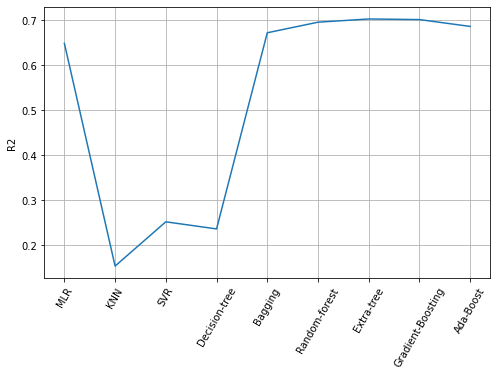

In [38]:
pd.Series(R2, index=('MLR', 'KNN', 'SVR', 'Decision-tree', 'Bagging', 'Random-forest', 'Extra-tree', 'Gradient-Boosting', 'Ada-Boost')).plot(grid=True, figsize=(8,5))
plt.xticks(rotation = 60)
plt.ylabel('R2')
plt.show()

In [39]:
MAE

[0.3793710201942583,
 0.5769759808791207,
 0.5204023312542517,
 0.5168667353479852,
 0.364262564697017,
 0.35358376099663824,
 0.3469466677838834,
 0.3614130470762153,
 0.36677713122710615]

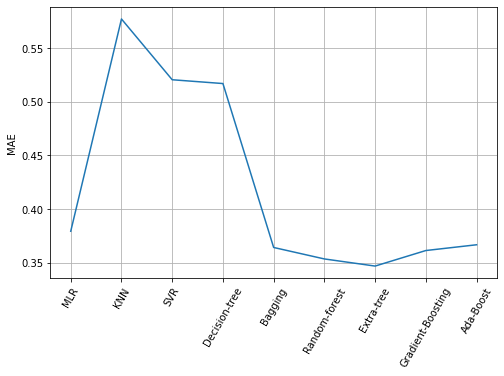

In [40]:
pd.Series(MAE, index=('MLR', 'KNN', 'SVR', 'Decision-tree', 'Bagging', 'Random-forest', 'Extra-tree', 'Gradient-Boosting', 'Ada-Boost')).plot(grid=True, figsize=(8,5))
plt.xticks(rotation = 60)
plt.ylabel('MAE')
plt.show()

Bagging parameter tuning

In [41]:
e = []
for i in np.arange(50,500,50):   
  bag = BaggingRegressor(DecisionTreeRegressor(random_state=0), random_state=0, n_estimators = i)
  bag.fit(train_x, y_train)
  y_valid_pred = bag.predict(valid_x)

  e.append(mae(y_valid, y_valid_pred))

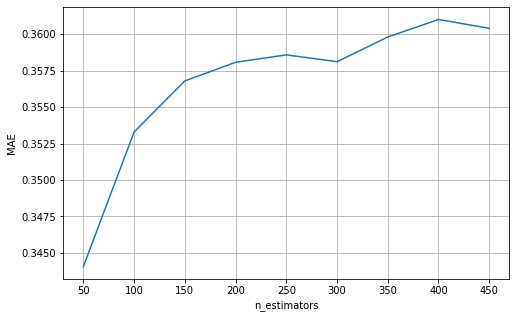

In [42]:
pd.Series(e, index=np.arange(50,500,50)).plot(grid= True, figsize=(8,5))
plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.show()

In [43]:
bag = BaggingRegressor(DecisionTreeRegressor(random_state=0), n_estimators = 50, random_state=0)

bag.fit(train_x, y_train)
y_valid_pred = bag.predict(valid_x)

mae(y_valid, y_valid_pred)

0.3440605793617217

Random forest parameter tuning

In [44]:
e = []
for i in np.arange(50,500,50):   
  rf = RandomForestRegressor( random_state=0, n_estimators = i)
  rf.fit(train_x, y_train)
  y_valid_pred = bag.predict(valid_x)

  e.append(mae(y_valid, y_valid_pred))

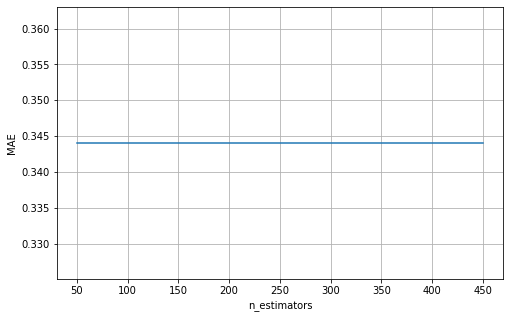

In [45]:
pd.Series(e, index=np.arange(50,500,50)).plot(grid= True, figsize=(8,5))
plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.show()

In [46]:
rf = RandomForestRegressor(n_estimators = 50, random_state=0)

rf.fit(train_x, y_train)
y_valid_pred = rf.predict(valid_x)

mae(y_valid, y_valid_pred)

0.3478886583131081

Extra-tree parameter tuning

In [47]:
e = []
for i in np.arange(50,500,50):   
  et = ExtraTreesRegressor(random_state=0, n_estimators = i)
  et.fit(train_x, y_train)
  y_valid_pred = bag.predict(valid_x)

  e.append(mae(y_valid, y_valid_pred))

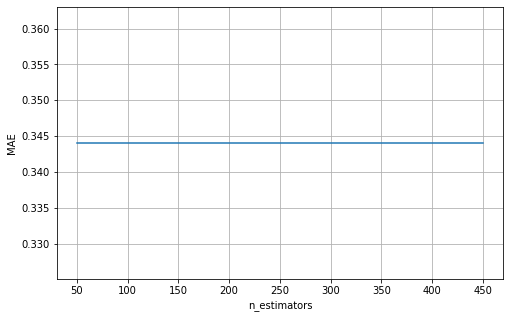

In [48]:
pd.Series(e, index=np.arange(50,500,50)).plot(grid= True, figsize=(8,5))
plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.show()

In [49]:
et = ExtraTreesRegressor(random_state=0)

et.fit(train_x, y_train)
y_valid_pred = et.predict(valid_x)

mae(y_valid, y_valid_pred)

0.3469466677838834

Gradient-Boosting parameter tuning

In [50]:
e = []
for i in np.arange(50,500,50):
  for j in np.arange(0.1, 0.5, 0.1):   
    grad = GradientBoostingRegressor(random_state=0, n_estimators = i, learning_rate = j)
    grad.fit(train_x, y_train)
    y_valid_pred = grad.predict(valid_x)

    e.append(mae(y_valid, y_valid_pred))

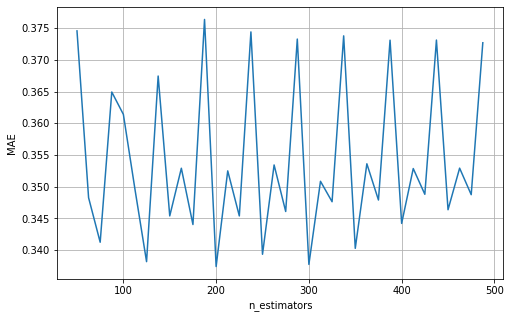

In [51]:
pd.Series(e, index=np.arange(50,500,50/4)).plot(grid= True, figsize=(8,5))
plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.show()

In [52]:
grad = GradientBoostingRegressor(n_estimators = 50, learning_rate = 0.1, random_state=0)

grad.fit(train_x, y_train)
y_valid_pred = grad.predict(valid_x)

mae(y_valid, y_valid_pred)

0.3745783945093643

Ada-Boost Parameter tuning

In [53]:
e = []
for i in np.arange(50,500,50):
  for j in np.arange(0.1, 0.5, 0.1): 
    ada = AdaBoostRegressor(DecisionTreeRegressor(random_state=0), random_state=0, n_estimators = i, learning_rate = 0.1)
    ada.fit(train_x, y_train)
    y_valid_pred = ada.predict(valid_x)

    e.append(mae(y_valid, y_valid_pred))

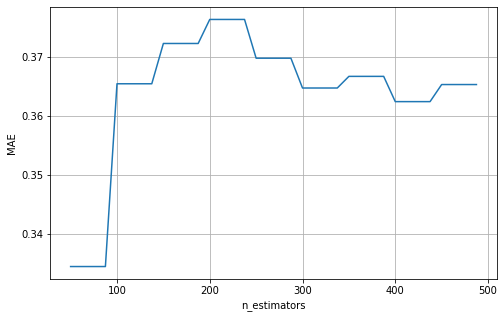

In [54]:
pd.Series(e, index=np.arange(50,500,50/4)).plot(grid= True, figsize=(8,5))
plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.show()

In [55]:
ada = AdaBoostRegressor(DecisionTreeRegressor(random_state=0), random_state=0, n_estimators = 100, learning_rate = 0.1)

ada.fit(train_x, y_train)
y_valid_pred = ada.predict(valid_x)

mae(y_valid, y_valid_pred)

0.3653993092517006



1.Bagging->   0.3440

2.RandomForest->   0.3478

3.ExtraTrees->   0.3469

4.GradientBoost->   0.3745

5.AdaBoost-> 0.3653



Using my Best Model to predict on the test set

In [56]:
# save best model
import pickle

pickle.dump(bag,open('tdc.pkl','wb'))

In [57]:
# Importent features extractor function

def useful_molecular_descriptors(table):

  descriptors = pd.DataFrame()

  mol = [Chem.MolFromSmiles(drug) for drug in table.Drug]

  # Exact molecular weight of the molecule
  tdc= []
  tdc.append([Descriptors.ExactMolWt(i) for i in mol])
  descriptors['Exact_MW'] = tdc[0]

  # FpDensityMorgan1
  tdc= []
  tdc.append([Descriptors.FpDensityMorgan1(i) for i in mol])
  descriptors['FpDensityMorgan1'] = tdc[0]

  # FpDensityMorgan2
  tdc= []
  tdc.append([Descriptors.FpDensityMorgan2(i) for i in mol])
  descriptors['FpDensityMorgan2'] = tdc[0]

  # Average molecular weight of the molecule ignoring hydrogens
  tdc= []
  tdc.append([Descriptors.HeavyAtomMolWt(i) for i in mol])
  descriptors['HeavyAtomMolWt'] = tdc[0]

  # MaxAbsPartialCharge
  tdc= []
  tdc.append([Descriptors.MaxAbsPartialCharge(i) for i in mol])
  descriptors['MaxAbsPartialCharge'] = tdc[0]

  # MinAbsPartialCharge
  tdc= []
  tdc.append([Descriptors.MinAbsPartialCharge(i) for i in mol])
  descriptors['MinAbsPartialCharge'] = tdc[0]

  # MinPartialCharge
  tdc= []
  tdc.append([Descriptors.MinPartialCharge(i) for i in mol])
  descriptors['MinPartialCharge'] = tdc[0]

   # Average molecular weight of the molecule
  tdc= []
  tdc.append([Descriptors.MolWt(i) for i in mol])
  descriptors['MolWt'] = tdc[0]

  # Number of valence electrons of the molecule
  tdc= []
  tdc.append([Descriptors.NumValenceElectrons(i) for i in mol])
  descriptors['NumValenceElectrons'] = tdc[0]

  # Log of partition coefficient
  tdc= []
  tdc.append([Descriptors.MolLogP(i) for i in mol])
  descriptors['Partition_Coefficient'] = tdc[0]


  ### Lipinski Descriptors ###

  # Number of heavy atoms a molecule
  tdc= []
  tdc.append([Lipinski.HeavyAtomCount(i) for i in mol])
  descriptors['Heavy_atoms'] = tdc[0]

  # Number of NHs or OHs
  tdc= []
  tdc.append([Lipinski.NHOHCount(i) for i in mol])
  descriptors['NHs/OHs'] = tdc[0]

  # Number of Nitrogens and Oxygens
  tdc= []
  tdc.append([Lipinski.NOCount(i) for i in mol])
  descriptors['N&O'] = tdc[0]

  # Number of aliphatic (containing at least one non-aromatic bond) heterocycles for a molecule
  tdc= []
  tdc.append([Lipinski.NumAliphaticHeterocycles(i) for i in mol])
  descriptors['Aliphatic_heterocycles'] = tdc[0]

  # Number of aliphatic (containing at least one non-aromatic bond) rings for a molecule
  tdc= []
  tdc.append([Lipinski.NumAliphaticRings(i) for i in mol])
  descriptors['Aliphatic_rings'] = tdc[0]

 # Nmber of aromatic carbocycles for a molecule
  tdc= []
  tdc.append([Lipinski.NumAromaticCarbocycles(i) for i in mol])
  descriptors['Aromatic_carbocycles'] = tdc[0]

  # Number of aromatic rings for a molecule
  tdc= []
  tdc.append([Lipinski.NumAromaticRings(i) for i in mol])
  descriptors['Aromatic_rings'] = tdc[0]

  # Number of Hydrogen Bond Acceptors
  tdc= []
  tdc.append([Lipinski.NumHAcceptors(i) for i in mol])
  descriptors['HAcceptors'] = tdc[0]

  # Number of Hydrogen Bond Donors
  tdc= []
  tdc.append([Lipinski.NumHDonors(i) for i in mol])
  descriptors['HDonors'] = tdc[0]

  # Number of Heteroatoms
  tdc= []
  tdc.append([Lipinski.NumHeteroatoms(i) for i in mol])
  descriptors['Heteroatoms'] = tdc[0]

  # Number of Rotatable Bonds
  tdc= []
  tdc.append([Lipinski.NumRotatableBonds(i) for i in mol])
  descriptors['Rotatable_Bonds'] = tdc[0]

  # Number of saturated heterocycles for a molecule
  tdc= []
  tdc.append([Lipinski.NumSaturatedHeterocycles(i) for i in mol])
  descriptors['Saturated_Heterocycles'] = tdc[0]

  # Number of saturated rings for a molecule
  tdc= []
  tdc.append([Lipinski.NumSaturatedRings(i) for i in mol])
  descriptors['Saturated_Rings'] = tdc[0]

  # Number of rings for a molecule
  tdc= []
  tdc.append([Lipinski.RingCount(i) for i in mol])
  descriptors['Rings'] = tdc[0]

  return descriptors

In [58]:
from tdc.benchmark_group import admet_group
group = admet_group(path = 'data/')
predictions_list = []

for seed in [1, 2, 3, 4, 5]:
  benchmark = group.get('Caco2_Wang') 
  # all benchmark names in a benchmark group are stored in group.dataset_names
  predictions = {}
  name = benchmark['name']
  train_val, test = benchmark['train_val'], benchmark['test']
  train, valid = group.get_train_valid_split(benchmark = name, split_type = 'default', seed = seed)
  
  # features extraction
  train_x = useful_molecular_descriptors(train)
  valid_x = useful_molecular_descriptors(valid)
  test_x = useful_molecular_descriptors(test)

  # target column
  y_train = train.Y
  y_valid = valid.Y
  y_test = test.Y

  # merging traning and validation set
  x_train = pd.concat([train_x, valid_x])
  y_train = pd.concat([y_train, y_valid], axis=0)

  # loading saved model
  model = pickle.load(open('tdc.pkl','rb'))
  # train saved model on train & validation set
  model.fit(x_train, y_train)
  # prediction on test set
  y_pred_test = model.predict(test_x)

  predictions[name] = y_pred_test
  predictions_list.append(predictions)

results = group.evaluate_many(predictions_list)

Found local copy...
generating training, validation splits...
100%|██████████| 728/728 [00:00<00:00, 2612.76it/s]
generating training, validation splits...
100%|██████████| 728/728 [00:00<00:00, 2826.83it/s]
generating training, validation splits...
100%|██████████| 728/728 [00:00<00:00, 2766.06it/s]
generating training, validation splits...
100%|██████████| 728/728 [00:00<00:00, 2619.15it/s]
generating training, validation splits...
100%|██████████| 728/728 [00:00<00:00, 2765.45it/s]


In [59]:
results

{'caco2_wang': [0.33, 0.012]}